In [2]:
import numpy as np
import pandas as pd
import scipy
import math
import random
import matplotlib.pyplot as plt

In [3]:
d = list(range(0,7,1))
linear = [x*2 + 3 + random.uniform(-0.75, 1.5) for x in d]
root = [math.sqrt(x) + random.uniform(-0.1, 0.1) for x in d]

In [4]:
df_linear = pd.DataFrame({"x": d, "values": linear})
df_root = pd.DataFrame({"x": d, "values": root})

In [5]:
df_linear

,x,values
0,0,4.130000
1,1,5.421576
2,2,6.869388
3,3,9.904289
4,4,10.683537
5,5,14.190861
6,6,14.644025


In [6]:
df_root

,x,values
0,0,0.003616
1,1,1.033218
2,2,1.360639
3,3,1.787828
4,4,1.962722
5,5,2.176962
6,6,2.384494


In [7]:
df_linear.dtypes

x           int64
values    float64
dtype: object

In [8]:
df_linear['x'] = df_linear['x'].astype(float)
df_root['x'] = df_root['x'].astype(float)

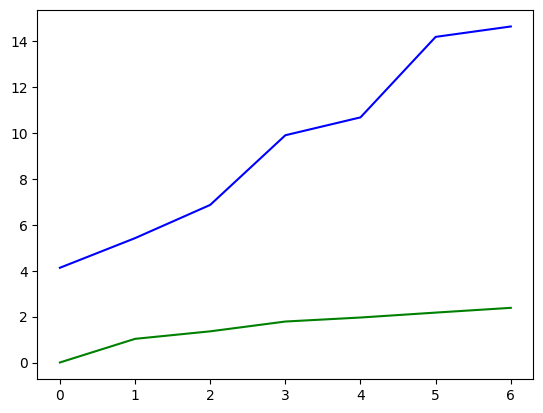

In [9]:
plt.plot(df_linear['x'], df_linear['values'], 'b-', label='data')
plt.plot(df_root['x'], df_root['values'], 'g-', label='data')

In [10]:
def func_lin(x, a, b):
    return a * x + b
def func_poly(x, a, b):
    return a * x ** b

In [27]:
# popt returns an array of the fitted parameters
# pcov returns a 2-D of the approxmated covariance of popt. The statistical concept is not quite clear. Definitely it's not an error function, like R²
popt, pcov = scipy.optimize.curve_fit(func_lin,df_linear["x"],df_linear["values"])

In [12]:
popt

array([1.88909981, 3.73894017])

In [13]:
popt2, pcov2 = scipy.optimize.curve_fit(func_poly,df_root["x"],df_root["values"])

In [14]:
popt2

array([1.02227059, 0.47318418])

### Using a numpy Polynomial to fit the data points
a Polynomial is an object of the type $a+bx+cx²$. In numpy it's represented by the only coefficients in a 1D np.array. The coefficient at index position zero corresponds to the variable *a* times x⁰, the coefficient at position 1 corresbonds to the variable *b* times x¹ and so on
```Python
from numpy.polynomial import Polynomial
p = Polynomial([3, 2, 1])
```
p represents the Polynomial object $3 + 2x +x²$

In [18]:
# Fit a polynomial of degree 2 to the data
from numpy.polynomial import Polynomial
degree = 2
# Returns a polynomial object fitted to the data points
poly_fit = Polynomial.fit(df_root["x"],df_root["values"], degree)
# to get the coefficients
poly_fit.convert().coef

array([ 0.14666257,  0.72835341, -0.06167671])

In [19]:
df_root['fitted'] = poly_fit(df_root['x'])

In [20]:
df_root

,x,values,fitted
0,0.0,0.003616,0.146663
1,1.0,1.033218,0.813339
2,2.0,1.360639,1.356663
3,3.0,1.787828,1.776632
4,4.0,1.962722,2.073249
5,5.0,2.176962,2.246512
6,6.0,2.384494,2.296421


As we can see the Polynomial isn't the best fit for the datapoints

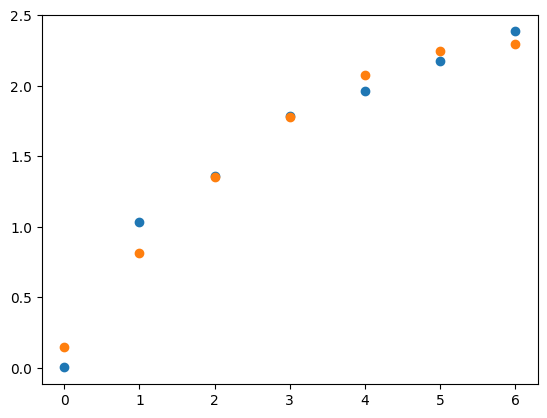

In [23]:
fig, ax = plt.subplots()
ax.scatter(df_root["x"], df_root["values"])
ax.scatter(df_root["x"], df_root["fitted"])

### Important insight
**this teaches us an important insight! Whenever we fit some curves to data, the curve's expression should be known beforehand!**
<p>
In order to properly reproduce Excel's Power Law trend line it's necessary to define the corresponding function and use scipy's curve fit method
<p>


In [31]:
def power_law(x, a, b):
    return a*x**b
popt, pcov = scipy.optimize.curve_fit(power_law, df_root["x"],df_root["values"])
popt = list(popt)
popt

[1.0222705918203776, 0.4731841804548426]

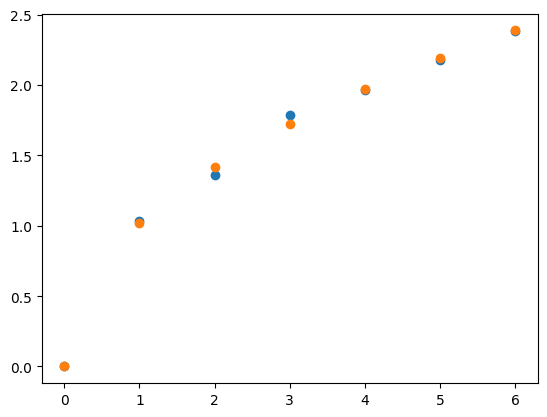

In [33]:
df_root['fitted'] = power_law(df_root['x'], popt[0], popt[1])
fig, ax = plt.subplots()
ax.scatter(df_root["x"], df_root["values"])
ax.scatter(df_root["x"], df_root["fitted"])